In [1]:
import os
import random

from time import time
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

seed = datetime.today().year
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

plt.style.use("seaborn-whitegrid")


In [2]:
def polynomial(inputs, n=2):
    return inputs ** np.arange(n)


N = 2**10
inputs = np.random.normal(-1, 1, (N, 1))
features = polynomial(inputs)
targets = np.random.uniform(-10, 10, N)


In [3]:
# Hyperparameter
lr = 1e-8
weights = np.random.normal(size=(1, features.shape[-1]))
batch_size = 2**5
patience = 2000
# Logger
i_patience = 0
loss_best = np.inf
loss_train = []
step = 0
progbar = tqdm()
update_interval = 2
time_start = time()
weights_best = None
while i_patience < patience:
    losses = []
    permutation = np.random.permutation(len(inputs))
    inputs = inputs[permutation]
    features = features[permutation]
    targets = targets[permutation]
    for i in range(len(inputs) // batch_size):
        inputs_batch = inputs[i : i + batch_size]
        features_batch = features[i : i + batch_size]
        targets_batch = targets[i : i + batch_size]
        # model(features)
        outputs = features_batch @ weights.T
        # loss = criterion(features_batch, targets_batch)
        loss = np.mean(np.square(outputs - targets_batch)) / 2
        # loss.backward()
        weights_gradient = features_batch.T @ (outputs - targets_batch)
        weights_gradient = np.mean(weights_gradient, -1)

        # optimizer.step() (SGD)
        weights = weights - lr * weights_gradient

        losses += [loss]
        loss = np.mean(losses)
    if loss_best > loss:
        i_patience = 0
        loss_best = loss
        weights_best = weights
    else:
        i_patience += 1
    if int(time() - time_start) % update_interval == 0:
        progbar.set_postfix(loss=loss, loss_best=loss_best)
        progbar.update(step)
        step = 0
    loss_train += [loss]
    step += 1
    weights = weights_best
progbar.set_postfix(loss=loss, loss_best=loss_best)
progbar.update(step)
progbar.close()


5602it [00:09, 571.26it/s, loss=17.5, loss_best=11.2]


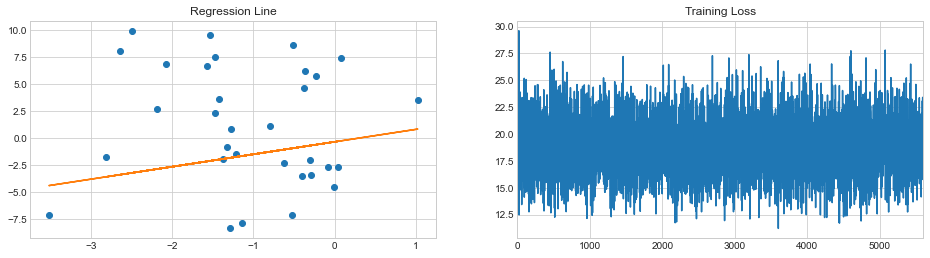

In [4]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.title("Regression Line")
plt.plot(inputs_batch, targets_batch, "o")
plt.plot(inputs_batch, outputs)
plt.subplot(122)
plt.title("Training Loss")
plt.plot(np.arange(len(loss_train)) + 1, loss_train)
plt.xlim(0, len(loss_train) + 1)
plt.show()
